LOAD TỆP NHÃN DỮ LIỆU TỪ FILE TXT

In [15]:
!wget 'https://raw.githubusercontent.com/TungCan273/QuickDraw/master/mini_classes.txt'

--2023-03-06 07:34:36--  https://raw.githubusercontent.com/TungCan273/QuickDraw/master/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 759 [text/plain]
Saving to: ‘mini_classes.txt.1’

mini_classes.txt.1  100%[===================>]     759  --.-KB/s    in 0s      

2023-03-06 07:34:36 (35.3 MB/s) - ‘mini_classes.txt.1’ saved [759/759]



ĐỌC TỆP

In [16]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [17]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

TẠO 1 TỆP DATA ĐỂ LƯU DỮ LIỆU TẢI VỀ

In [18]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


TẢI DỮ LIỆU

In [19]:
import urllib.request

base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
for c in classes:        
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

THÊM CÁC THƯ VIỆN CẦN SỬ DỤNG

In [20]:
import os
import glob
import pickle
import numpy as np
from tensorflow.python.keras import layers
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical, np_utils

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow import keras 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
print(len(os.listdir('data')))

100


In [21]:
print(os.listdir('data'))

['tennis_racquet.npy', 'ladder.npy', 'cat.npy', 'cookie.npy', 'cup.npy', 'pillow.npy', 'star.npy', 'drums.npy', 'rifle.npy', 'traffic_light.npy', 'eye.npy', 'stop_sign.npy', 'clock.npy', 'helmet.npy', 'shorts.npy', 'candle.npy', 'lollipop.npy', 'table.npy', 'ice_cream.npy', 't-shirt.npy', 'lightning.npy', 'pants.npy', 'snake.npy', 'tooth.npy', 'hot_dog.npy', 'baseball.npy', 'frying_pan.npy', 'pizza.npy', 'eyeglasses.npy', 'bird.npy', 'cell_phone.npy', 'axe.npy', 'laptop.npy', 'saw.npy', 'mushroom.npy', 'baseball_bat.npy', 'suitcase.npy', 'smiley_face.npy', 'headphones.npy', 'key.npy', 'sword.npy', 'bread.npy', 'syringe.npy', 'book.npy', 'pencil.npy', 'car.npy', 'bridge.npy', 'spoon.npy', 'tree.npy', 'wheel.npy', 'microphone.npy', 'grapes.npy', 'shovel.npy', 'wristwatch.npy', 'paper_clip.npy', 'sock.npy', 'face.npy', 'airplane.npy', 'hammer.npy', 'broom.npy', 'screwdriver.npy', 'triangle.npy', 'butterfly.npy', 'radio.npy', 'door.npy', 'line.npy', 'envelope.npy', 'mountain.npy', 'tent.np

HÀM LOAD_DATA ĐƯỢC SỬ DỤNG ĐỂ LÀM VIỆC VỚI DỮ LIỆU 

In [22]:
import tensorflow as tf
import numpy as np
import os
import glob

def load_data(root, vfold_ratio=0.2, max_items_per_class=5000):
    files = glob.glob(os.path.join(root, '*.npy'))
    
    data = np.empty([0, 784])
    labels = np.empty([0], dtype=int)
    class_names = []

    for idx, file in enumerate(files):
        class_name,_ = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

        class_data = np.load(file)[0:max_items_per_class, : ]
        class_labels = np.full(class_data.shape[0], idx)

        data = np.concatenate((data, class_data), axis=0)
        labels = np.append(labels, class_labels)

    class_data = None
    class_labels = None

    #random dataset 
    x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=42, test_size=0.2)
    x_test = x_test.astype('float32')
    y_test = y_test.astype('float32')
    
    print("x_train\n",x_train, x_train.shape)
    print("y_train\n",y_train, y_train.shape)
    print("x_test\,",x_test, x_test.shape)
    print("y_test\n",y_test, y_test.shape)

    return x_train, y_train, x_test, y_test, class_names

In [23]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

x_train
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (400000, 784)
y_train
 [53 99 17 ... 26 29 24] (400000,)
x_test\, [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (100000, 784)
y_test
 [20. 39. 28. ... 30. 10. 48.] (100000,)


RANDOM 1 DỮ LIỆU BẤT KÌ,
IN RA CLASS_NAME CỦA NÓ VÀ BỨC ẢNH ĐẠI DIỆN CHO NHÃN ĐÓ

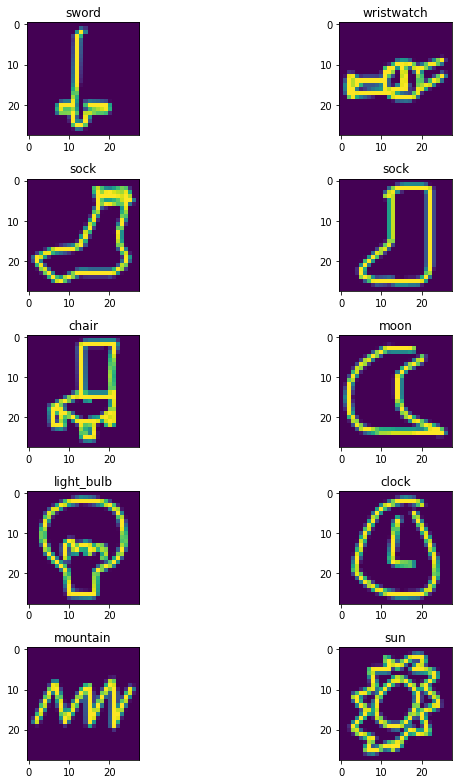

In [24]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  

bg,cg = plt.subplots(5,2)
bg.set_size_inches(11,11)
for i in range(5):
  for j in range(2):
    id = randint(0,len(x_train))
    cg[i,j].imshow(x_train[id].reshape(28,28))
    cg[i,j].set_title(class_names[int(y_train[id].item())])
plt.tight_layout()

RESHAPE 

In [25]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(num_classes)

100


XÂY DỰNG MÔ HÌNH HOÀN CHỈNH

In [26]:
# Define model
model = keras.Sequential()
model.add(Conv2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(100, activation='softmax'))

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

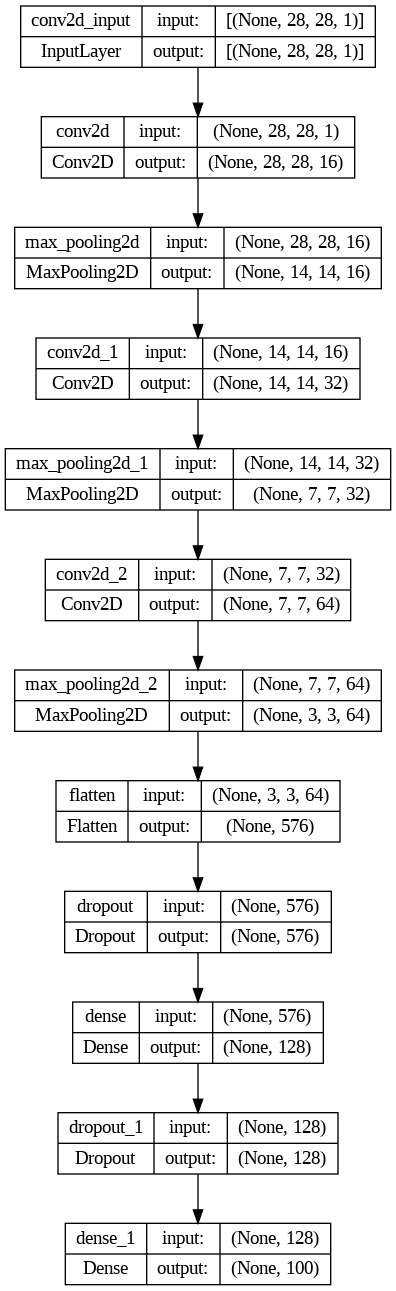

In [27]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [29]:
History = model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size = 256, verbose=1, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 360s 229ms/step - loss: 2.8091 - top_k_categorical_accuracy: 0.6057 - val_loss: 1.7072 - val_top_k_categorical_accuracy: 0.8470
Epoch 2/5
1563/1563 [==============================] - 363s 232ms/step - loss: 2.1504 - top_k_categorical_accuracy: 0.7627 - val_loss: 1.4977 - val_top_k_categorical_accuracy: 0.8748
Epoch 3/5
1563/1563 [==============================] - 359s 230ms/step - loss: 2.0145 - top_k_categorical_accuracy: 0.7876 - val_loss: 1.3687 - val_top_k_categorical_accuracy: 0.8878
Epoch 4/5
1563/1563 [==============================] - 365s 233ms/step - loss: 1.9320 - top_k_categorical_accuracy: 0.8008 - val_loss: 1.3108 - val_top_k_categorical_accuracy: 0.8941
Epoch 5/5
1563/1563 [==============================] - 339s 217ms/step - loss: 1.8773 - top_k_categorical_accuracy: 0.8088 - val_loss: 1.2659 - val_top_k_categorical_accuracy: 0.8997


In [30]:
import matplotlib.pyplot as plt
test_loss, score = model.evaluate(x_test, y_test)

print('loss: ',test_loss)
print('Test accuarcy: {:0.2f}%'.format(score* 100))


3125/3125 [==============================] - 39s 12ms/step - loss: 1.2659 - top_k_categorical_accuracy: 0.8997
loss:  1.2658902406692505
Test accuarcy: 89.97%


In [39]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['top_k_categorical_accuracy']
    val_accuracy = training_history.history['val_top_k_categorical_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])

    plt.subplot(1, 2, 2)
    plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
    plt.plot(History.history['top_k_categorical_accuracy'])
    plt.plot(History.history['val_top_k_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])

    plt.show()

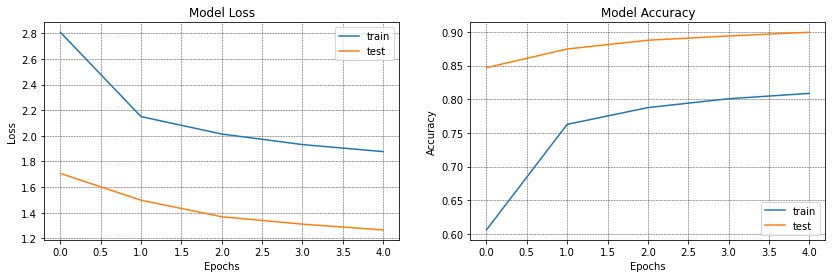

In [40]:
render_training_history(History)

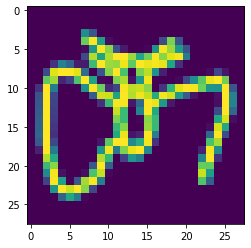

In [33]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 

In [34]:
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
print([class_names[x] for x in ind])

1/1 [==============================] - 0s 209ms/step
['butterfly', 'book', 'drums', 'apple', 'coffee_cup']


In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [ ]:
!pip install tensorflowjs 

In [ ]:
# model.save('C:/Users/Acer/OneDrive/Máy tính/Python/Project AI/QuickDraw/keras.h5')
model.save('model.h5')